Gold Price Prediction - Tarun Sriram 21BCE4001

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Processing

In [ ]:
# Loading csv data to a Pandas DataFrame
gold_data2 = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# SPX - The number tells you how many ounces of gold it would take to buy the S&P 500 on any given month.
# USO - Stock Market of Crude Oil.
# SLV is correlated with GLD(it is a fund for silver bullion)
# EUR/USD is a dollar-based currency pair that traders and investors can sell to simultaneously buy gold
gold_data = gold_data2.drop(['Date'], axis=1)

In [ ]:
# Print the first 5 rows in the DataFrame
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Print the last 5 rows of the DataFrame
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD
5182,2001.569946,117.540001,35.009998,17.77,1.285000
5183,2011.359985,117.779999,34.619999,17.77,1.292006
5184,1994.290039,116.849998,34.189999,17.08,1.285149
5185,1982.770020,117.599998,34.439999,17.07,1.285397
5186,1998.300049,117.050003,35.000000,16.99,1.277808


In [ ]:
# Number of Rows and Columns
gold_data.shape

(5187, 5)

In [ ]:
# Information of the Data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      5187 non-null   float64
 1   GLD      5187 non-null   float64
 2   USO      5187 non-null   float64
 3   SLV      5187 non-null   float64
 4   EUR/USD  5187 non-null   float64
dtypes: float64(5)
memory usage: 202.7 KB


In [ ]:
# Checking the number of the missing values
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Getting Statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,1683.427877,123.022860,32.045696,20.003828,1.290061
std,502.807442,21.889420,18.429757,6.688460,0.125712
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1277.300049,112.029999,16.080000,15.717000,1.187818
50%,1692.770020,121.330002,34.410000,17.950001,1.315097
75%,2056.149902,130.369995,37.680000,21.410000,1.369619
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation ---> Positive and Negative

In [ ]:
correlation = gold_data.corr()

<Axes: >

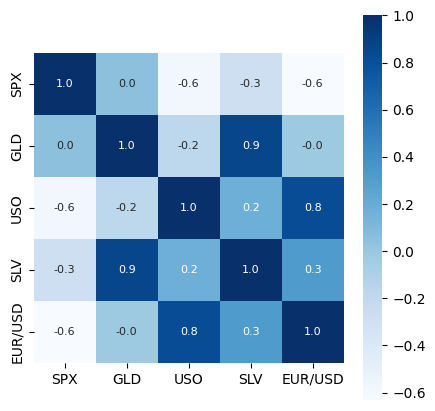

In [ ]:
# Heap Map to understand correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049376
GLD        1.000000
USO       -0.176856
SLV        0.863504
EUR/USD   -0.014894
Name: GLD, dtype: float64


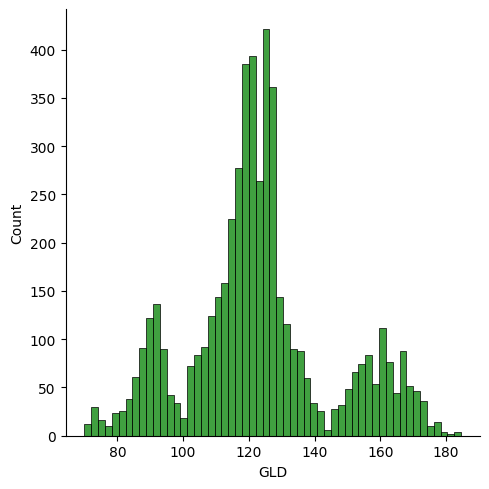

In [ ]:
# Checking the distribution of GLD price
sns.displot(gold_data['GLD'], color='green')

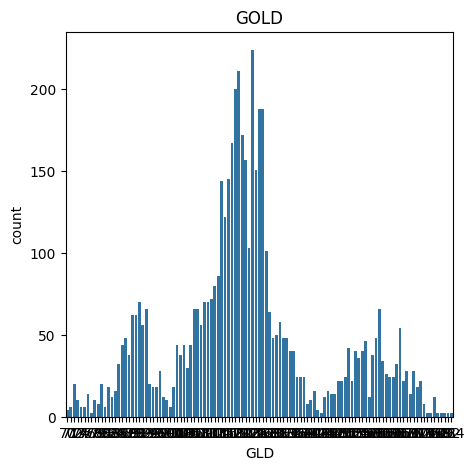

In [ ]:
# Checking the Countplot of GLD price
plt.figure(figsize=(5,5))
IntvalofGLD = gold_data['GLD'].astype(int)
sns.countplot(x=IntvalofGLD, data=gold_data)
plt.title('GOLD')
plt.show()

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO     SLV   EUR/USD
0     1447.160034  78.470001  15.180  1.471692
1     1447.160034  78.370003  15.285  1.474491
2     1411.630005  77.309998  15.167  1.475492
3     1416.180054  75.500000  15.053  1.468299
4     1390.189941  76.059998  15.590  1.557099
...           ...        ...     ...       ...
5182  2001.569946  35.009998  17.770  1.285000
5183  2011.359985  34.619999  17.770  1.292006
5184  1994.290039  34.189999  17.080  1.285149
5185  1982.770020  34.439999  17.070  1.285397
5186  1998.300049  35.000000  16.990  1.277808

[5187 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
5182    117.540001
5183    117.779999
5184    116.849998
5185    117.599998
5186    117.050003
Name: GLD, Length: 5187, dtype: float64


Importing the libraries required for Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Splitting into Training and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Training the Model: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[106.81789989 116.58530067 125.54890183 ... 124.23499814 154.81249866
 119.01480313]


In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.996029941182734


Compare the Actual Values and the Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

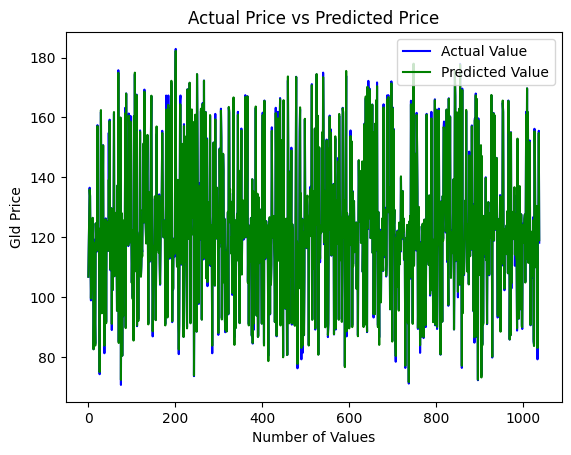

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gld Price')
plt.legend()
plt.show()

In [ ]:
import warnings
with warnings.catch_warnings():

  input_data = (1411.630005,77.309998,15.167,1.475492)
  # changing input_data to a numpy array
  input_data_as_numpy_array = np.asarray(input_data)
  # reshape the array
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = regressor.predict(input_data_reshaped)

  warnings.filterwarnings("ignore")

print(prediction)
print('The Gold cost is ', prediction[0])

[86.08080017]
The Gold cost is  86.08080016999999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
